#REGINALDO GREGÓRIO DE SOUZA NETO
##2252813

## Árvore de Decisão

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import itertools
df = pd.read_csv("Video_games_esrb_rating.csv")
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [2]:
df.shape

(1895, 34)

<Axes: >

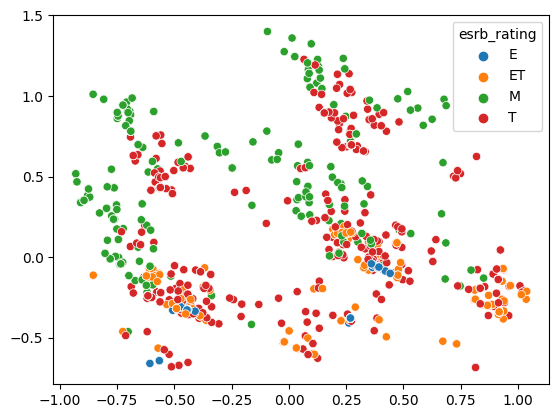

In [3]:
# Visualização com PCA
X = df.drop('title', axis=1)
X = X.drop('esrb_rating', axis=1)
y = df['esrb_rating']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2,
                                                        stratify=y,
                                                        random_state=0)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

sns.scatterplot(x=X_pca[:,0], y= X_pca[:,1], hue=y)

In [4]:
#Instancia uma árvore de decisão
ad = DecisionTreeClassifier(random_state=0)

#Realiza a criação da árvore de acordo com os dados de treino.
#A criação da árvore é chamada de indução
ad.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=0)

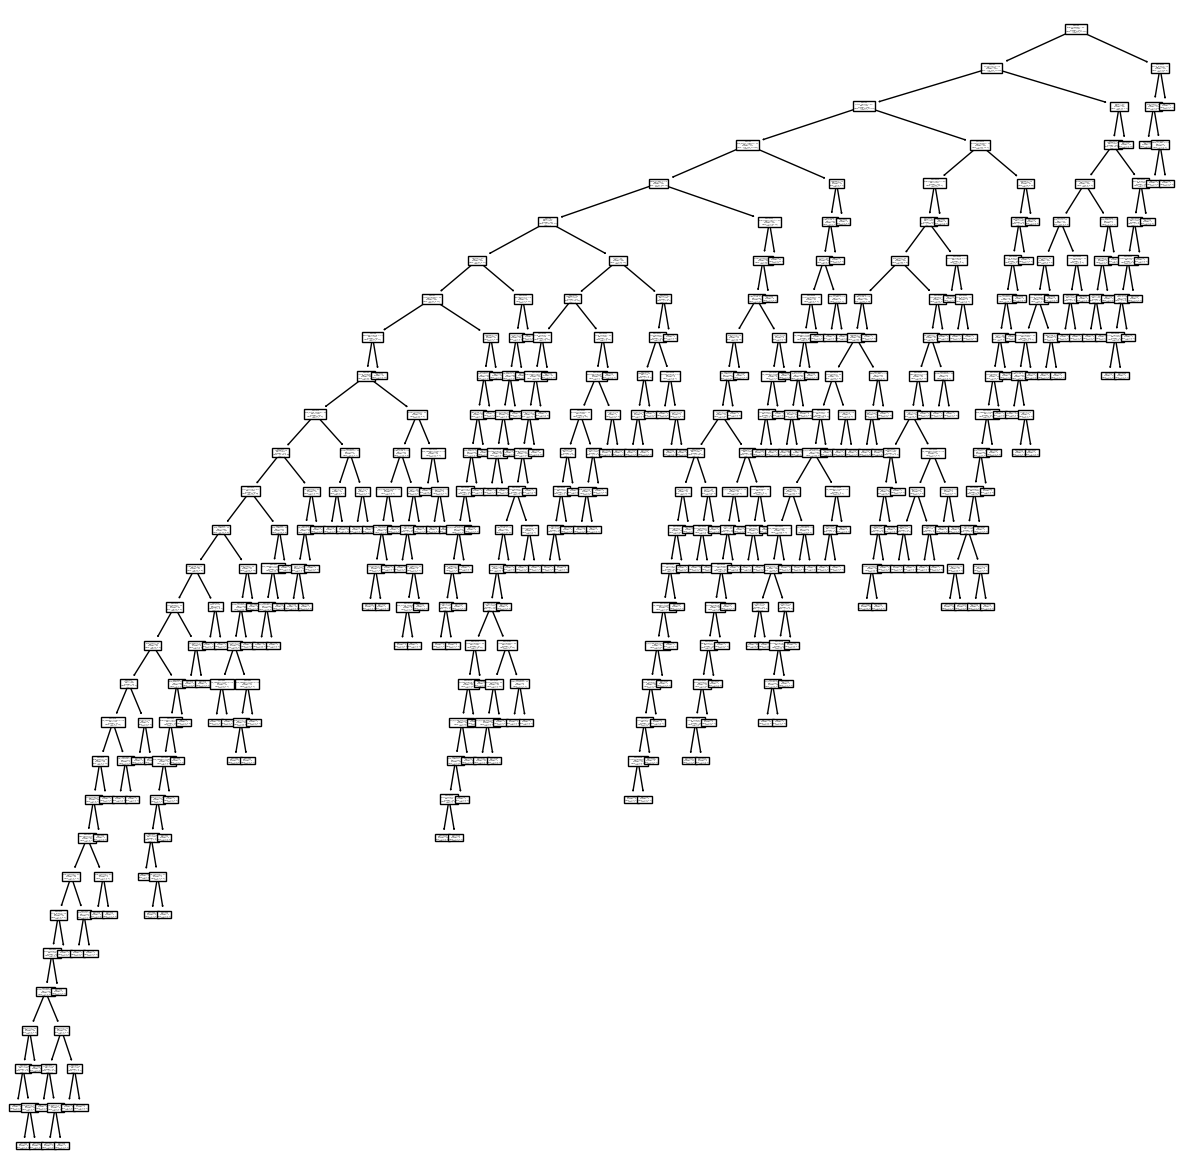

In [5]:
plt.figure(figsize=(15,15))
plot_tree(ad, class_names=ad.classes_, feature_names=X.columns, node_ids=True)
plt.show()

In [6]:
pred = ad.predict(X_teste)
print(classification_report(y_teste, pred))

              precision    recall  f1-score   support

           E       0.96      0.95      0.96        83
          ET       0.70      0.79      0.74        81
           M       0.95      0.90      0.92        77
           T       0.84      0.81      0.83       138

    accuracy                           0.85       379
   macro avg       0.86      0.86      0.86       379
weighted avg       0.86      0.85      0.86       379



## Limitando o número mínimo de exemplos para expandir um nó


In [7]:
ad = DecisionTreeClassifier(min_samples_split=10)
ad.fit(X_treino, y_treino)

DecisionTreeClassifier(min_samples_split=10)

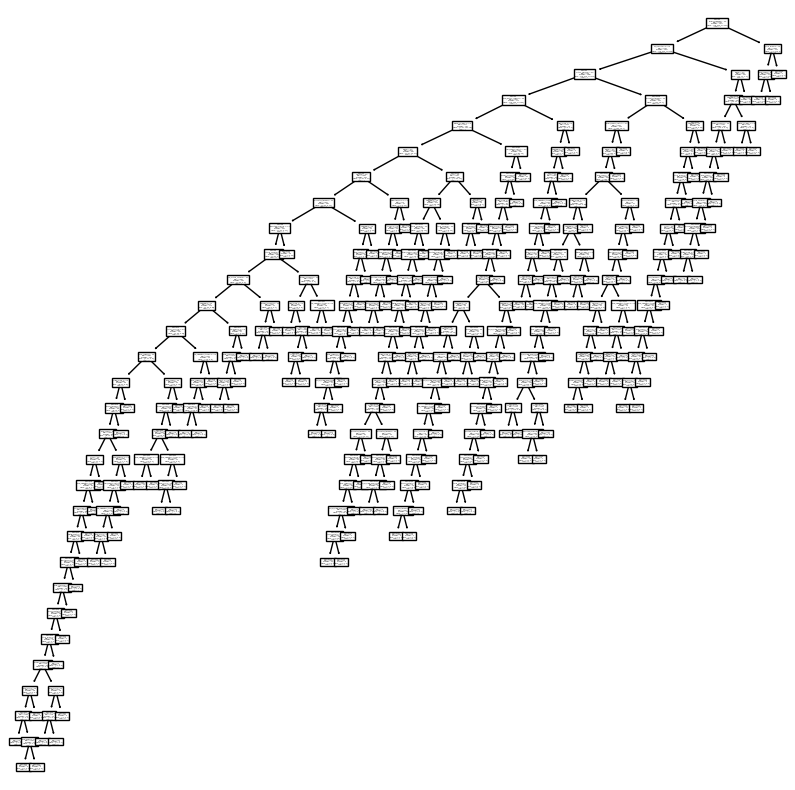

In [8]:
plt.figure(figsize=(10,10))
plot_tree(ad, class_names=ad.classes_, feature_names=X.columns, node_ids=True)
plt.show()

In [9]:
pred = ad.predict(X_teste)
print(classification_report(y_teste, pred))

              precision    recall  f1-score   support

           E       0.95      0.95      0.95        83
          ET       0.72      0.78      0.75        81
           M       0.88      0.90      0.89        77
           T       0.82      0.78      0.80       138

    accuracy                           0.84       379
   macro avg       0.85      0.85      0.85       379
weighted avg       0.84      0.84      0.84       379



## Limitando o número de exemplos nas folhas

In [10]:
ad = DecisionTreeClassifier(min_samples_leaf=10)
ad.fit(X_treino, y_treino)

DecisionTreeClassifier(min_samples_leaf=10)

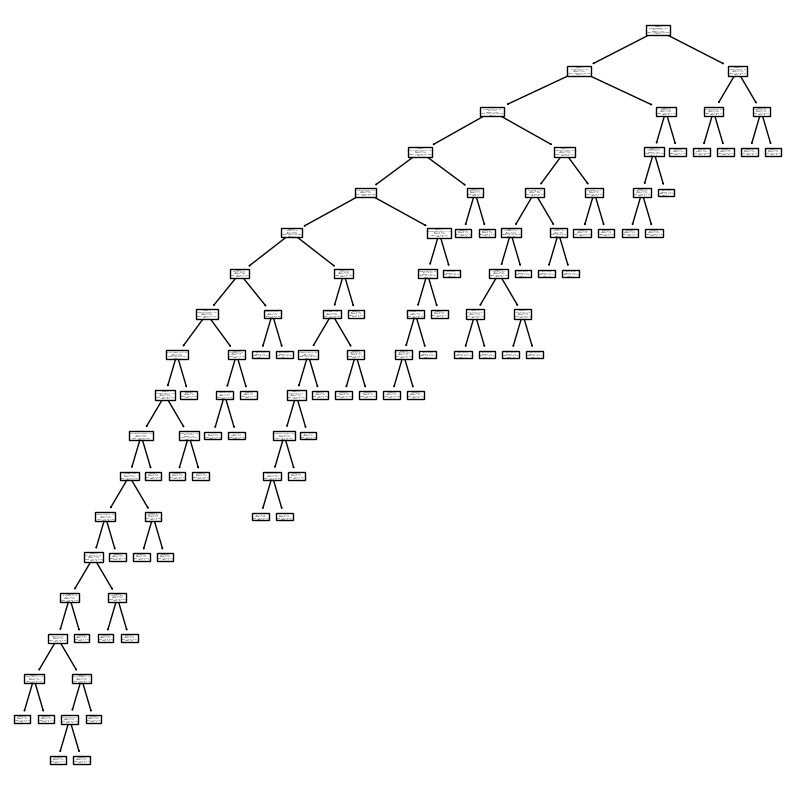

In [11]:
plt.figure(figsize=(10,10))
plot_tree(ad, class_names=ad.classes_, feature_names=X.columns, node_ids=True)
plt.show()

In [12]:
pred = ad.predict(X_teste)
print(classification_report(y_teste, pred))

              precision    recall  f1-score   support

           E       0.92      0.93      0.92        83
          ET       0.74      0.74      0.74        81
           M       0.90      0.83      0.86        77
           T       0.77      0.80      0.78       138

    accuracy                           0.82       379
   macro avg       0.83      0.82      0.83       379
weighted avg       0.82      0.82      0.82       379



## Limitando a profundidade máxima da árvore

In [13]:
ad = DecisionTreeClassifier(max_depth=2)
ad.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=2)

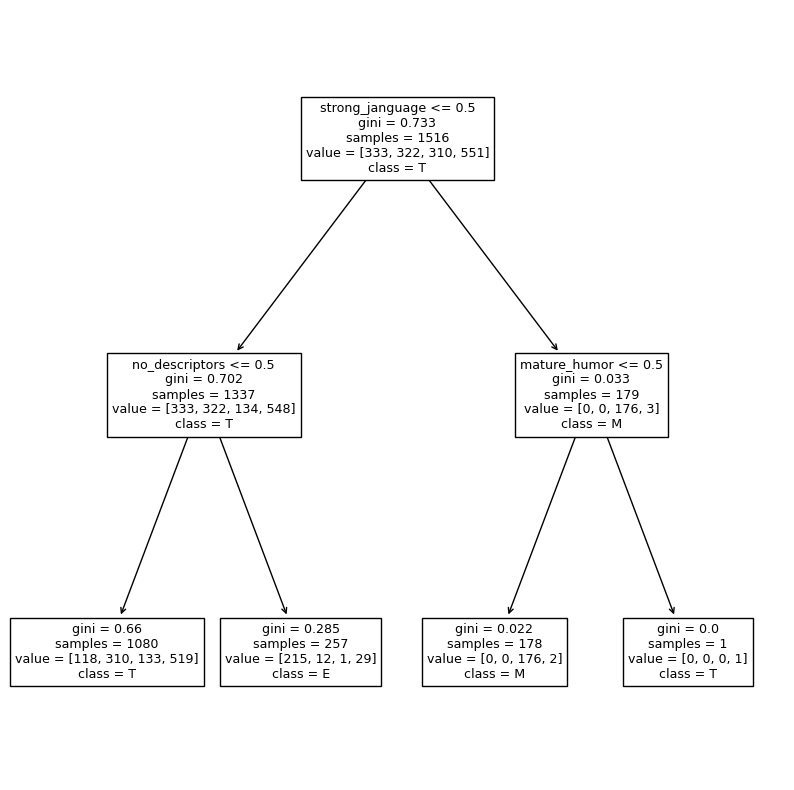

In [14]:
plt.figure(figsize=(10,10))
plot_tree(ad, class_names=ad.classes_, feature_names=X.columns)
plt.show()

In [15]:
pred = ad.predict(X_teste)
print(classification_report(y_teste, pred))

              precision    recall  f1-score   support

           E       0.84      0.61      0.71        83
          ET       0.00      0.00      0.00        81
           M       0.93      0.55      0.69        77
           T       0.47      0.93      0.62       138

    accuracy                           0.58       379
   macro avg       0.56      0.52      0.50       379
weighted avg       0.54      0.58      0.52       379



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Otimizando os parâmetros

Os exemplos acima servem apenas para visualizar o efeito dos parâmetros. Para escolher o modelo ideal (qual configuração de poda generaliza melhor) usamos validação cruzada para avaliar o efeito dos parâmetros em vários particionamentos diferentes, assim como fizemos na última aula para escolher entre usar a SVM e o KNN.

A função ``selecionar_melhor_ad`` faz a escolha da melhor combinação de hiperparâmetros no conjunto de validação. Em relação às funções semelhantes implementadas anteriormente (``selecionar_melhor_k_knn`` e ``selecionar_melhor_svm``), a principal diferença é a opção de validação cruzada para a escolha dos hiperparâmetros. O parâmetro ``cv_folds`` controla o número de folds usados (ou recebe um "*splitter*" como ``StratifiedKFold``) na validação cruzada para a seleção de hiperparâmetros.

In [16]:
def selecionar_melhor_ad(X_treino, X_val, y_treino, y_val, n_jobs=4, cv_folds=5,
                         max_depths=[None], min_samples_leafs=[1],
                         min_samples_splits=[2]):

    #Se for pra usar validação cruzada, usar GridSearchCV
    ad = DecisionTreeClassifier()

    #Configurar os valores que serão testados para cada parâmetro
    pg = {
        'max_depth' : max_depths,
        'min_samples_leaf' : min_samples_leafs,
        'min_samples_split' : min_samples_splits,
    }

    score_fn = 'f1' if len(set(y_treino)) < 3 else 'f1_weighted'

    ad = GridSearchCV(ad, pg, cv=cv_folds, n_jobs=n_jobs, scoring=score_fn)
    #Passar todos os dados (Treino e Validação) para realizar o treinamento do modelo final.
    ad.fit(np.vstack((X_treino, X_val)), [*y_treino, *y_val])

    melhor_comb = (ad.best_params_['max_depth'],
                   ad.best_params_['min_samples_leaf'],
                   ad.best_params_['min_samples_split'])

    melhor_val = ad.best_score_

    return ad, melhor_comb, melhor_val

A função ``do_cv_ad`` faz a avaliação da árvore de decisão por validação cruzada (descrita por ``cv_splits``). Para cada partição a melhor combinação de hiperparâmetros é encontrada (por validação cruzada, dependendo do parâmetro ``param_cv_folds``). O dicionário ``params_kwargs`` contém listas de parâmetros que devem ser avaliados para encontrar a melhor combinação. As chaves estão listadas abaixo, e os valores são listas com os parâmetros:

* ``max_depths``
* ``min_samples_leafs``
* ``min_samples_splits``

In [17]:
def do_cv_ad(X, y, cv_splits, param_cv_folds=5, **params_kwargs):

    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=1)

    f1s = []

    pgb = tqdm(total=cv_splits, desc='Folds avaliados')

    for treino_idx, teste_idx in skf.split(X, y):

        X_treino = X[treino_idx]
        y_treino = y[treino_idx]

        X_teste = X[teste_idx]
        y_teste = y[teste_idx]

        X_treino, X_val, y_treino, y_val = train_test_split(X_treino, y_treino,
                                                            stratify=y_treino,
                                                            test_size=0.2,
                                                            random_state=1)

        ad, melhor_comb, _ = selecionar_melhor_ad(X_treino, X_val, y_treino,
                                                  y_val,
                                                  cv_folds=param_cv_folds,
                                                  **params_kwargs)
        pred = ad.predict(X_teste)

        if len(set(y_treino)) > 2:
            f1 = f1_score(y_teste, pred, average='weighted')
        else:
            f1 = f1_score(y_teste, pred)
        f1s.append(f1)

        pgb.update(1)

    pgb.close()

    return f1s

In [18]:
def calcular_estatisticas(resultados):
    return np.mean(resultados), np.std(resultados), np.min(resultados), np.max(resultados)

def imprimir_estatisticas(resultados):
    media, desvio, mini, maxi = calcular_estatisticas(resultados)
    print("Resultados: %.2f +- %.2f, min: %.2f, max: %.2f" % (media, desvio, mini, maxi))

##Teste
### Avaliação da árvore de decisão com os parâmetros-padrão (DEF)

In [19]:
ad_f1s_default = do_cv_ad(X.values, y, 10)
imprimir_estatisticas(ad_f1s_default)

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Resultados: 0.85 +- 0.03, min: 0.82, max: 0.90


### Avaliação da árvore de decisão otimizando apenas a profundidade máxima (MD)

Neste teste estamos usando validação cruzada com 10 folds para a otimização dos hiperparâmetros.

In [20]:
ad_f1s_md = do_cv_ad(X.values, y, 10, param_cv_folds=10,
                     **{'max_depths' : [None,2, 3, 4, 5]})
imprimir_estatisticas(ad_f1s_md)

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Resultados: 0.85 +- 0.02, min: 0.82, max: 0.90


### Avaliação da árvore de decisão otimizando apenas a quantidade mínima de exemplos nas folhas (MSL)

Neste teste estamos usando validação cruzada com 10 folds para a otimização dos hiperparâmetros.

In [21]:
ad_f1s_msl = do_cv_ad(X.values, y, 10, param_cv_folds=10,
                      **{'min_samples_leafs' : [3, 5, 10, 15, 20, 30]})
imprimir_estatisticas(ad_f1s_msl)

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Resultados: 0.84 +- 0.03, min: 0.79, max: 0.89


### Avaliação da árvore de decisão otimizando apenas a quantidade mínima de exemplos para expandir um nó (MSS)

Neste teste estamos usando validação cruzada com 10 folds para a otimização dos hiperparâmetros.

In [22]:
ad_f1s_mss = do_cv_ad(X.values, y, 10, param_cv_folds=10,
                      **{'min_samples_splits' : [4, 8, 16, 32, 40]})
imprimir_estatisticas(ad_f1s_mss)

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Resultados: 0.84 +- 0.02, min: 0.81, max: 0.88


### Avaliação da árvore de decisão otimizando todos os hiperparâmetros de uma vez (TUDO)

Neste teste estamos usando validação cruzada com 10 folds para a otimização dos hiperparâmetros.

In [23]:
ad_f1s_tudo = do_cv_ad(X.values, y, 10, param_cv_folds=10,
                       **{'min_samples_leafs' : [3, 5, 10, 15, 20, 30],
                          'min_samples_splits' : [2, 4, 8, 16, 32, 40],
                          'max_depths' : [None,2, 3, 4, 5]})
imprimir_estatisticas(ad_f1s_tudo)

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Resultados: 0.84 +- 0.03, min: 0.79, max: 0.89


### Análise Estatística

A tabela abaixo resumo os resultados obtidos nos testes acima:

| Experimento | *f1-score* médio |
| :-: | :-: |
| DEF | $0.85 \pm 0.03$ |
| MD | $0.85 \pm 0.03$ |
| MSL | $0.84 \pm 0.03$ |
| MSS | $0.85 \pm 0.03$ |
| TUDO | $0.84 \pm 0.03$ |

Os resultados foram muito parecidos. Vamos verificar se a variação na média entre o melhor e o pior resultado é significativa usando o teste de hipótese nula. Se a variação entre o melhor resultado e o pior resultado não for significativa, a variação entre os outros pares de resultados provavelmente também não são significativas.

A função ``rejeitar_hip_nula`` recebe 2 conjuntos de resultados (no nosso caso listas de resultados por fold) e retorna se a hipótese nula deve ser rejeitada considerando o limiar de corte ``alpha``. A função também retorna o p-valor.

In [24]:
from scipy.stats import ttest_ind_from_stats
def rejeitar_hip_nula(amostra1, amostra2, alpha=0.05):
    media_amostral1, desvio_padrao_amostral1, _, _ = calcular_estatisticas(amostra1)


    media_amostral2, desvio_padrao_amostral2, _, _ = calcular_estatisticas(amostra2)


    _, pvalor = ttest_ind_from_stats(media_amostral1, desvio_padrao_amostral1,
                                     len(amostra1), media_amostral2,
                                     desvio_padrao_amostral2,
                                     len(amostra2))
    return (pvalor <= alpha, pvalor)

In [25]:
rejeitar_hip_nula(ad_f1s_tudo, ad_f1s_md)

(False, 0.18660239882661012)

Neste caso a hipótese nula não pode ser rejeitada com 95% de confiança (``alpha=0.05``). Desta forma, não é possível afirmar que há diferença significativa entre o melhor e o pior resultado obtido.

##TESTES COM OUTROS CLASSIFICADORES

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

In [27]:
def calcular_estatisticas(resultados):
    return np.mean(resultados), np.std(resultados), np.min(resultados), np.max(resultados)

In [28]:
def imprimir_estatisticas(resultados):
    media, desvio, mini, maxi = calcular_estatisticas(resultados)
    print("Resultados: %.2f +- %.2f, min: %.2f, max: %.2f" %
          (media, desvio, mini, maxi))

##RANDON FOREST

In [55]:
from sklearn.ensemble import RandomForestClassifier

def do_cv_rf(X, y, kfolds_first, kfolds_second):
    scores = []

    # cria as partições de validação cruzada no primeiro nível
    skf = StratifiedKFold(n_splits=kfolds_first, shuffle=True, random_state=1)

    for idx_treino, idx_teste in skf.split(X, y):
        X_treino = X[idx_treino]
        y_treino = y[idx_treino]
        X_teste = X[idx_teste]
        y_teste = y[idx_teste]

        # padroniza os dados de treinamento e teste
        scaler = StandardScaler()
        X_treino = scaler.fit_transform(X_treino)
        X_teste = scaler.transform(X_teste)

        params={'criterion' : ['gini', 'entropy'], 'random_state' : [1]}
        rf = RandomForestClassifier()

        # realiza a otimização do hiperparâmetro k no segundo nível com GridSearchCV
        rf_grid_search = GridSearchCV(estimator=rf,
                                       param_grid=params,
                                       cv=StratifiedKFold(kfolds_second),
                                       scoring='f1_weighted')

        rf_grid_search.fit(X_treino, y_treino)

        # calcula o desempenho usando a métrica específica fornecida (c_scorer)
        score = rf_grid_search.score(X_teste, y_teste)
        scores.append(score)

    return scores


In [58]:
accs_rf = do_cv_rf(np.asarray(X), y, 10, 5)

In [59]:
imprimir_estatisticas(accs_rf)

Resultados: 0.86 +- 0.03, min: 0.82, max: 0.90


##KNN

Para avaliação do desempenho do KNN, fiz a validação cruzada em dois níveis. No primeiro nível, os dados são dividos entre treino e teste usando estratificação e escalona as características. Em seguida, realiza-se uma busca em grade com validação cruzada para encontrar o melhor valor de $k$ (número de vizinhos) para o KNN. No segundo nível, o algoritmo avalia o desempenho do KNN com o melhor $k$ encontrado na etapa anterior, calculando a acurácia da classe positiva nos dados de teste. O processo é repetido para diferentes divisões dos dados e valores de $k$, resultando em uma lista de acurácias da classe positiva.

In [43]:
from sklearn.neighbors import KNeighborsClassifier

def do_cv_knn(X, y, kfolds_first, kfolds_second, ks=[1]):
    scores = []

    # cria as partições de validação cruzada no primeiro nível
    skf = StratifiedKFold(n_splits=kfolds_first, shuffle=True, random_state=1)

    for idx_treino, idx_teste in skf.split(X, y):
        X_treino = X[idx_treino]
        y_treino = y[idx_treino]
        X_teste = X[idx_teste]
        y_teste = y[idx_teste]

        # padroniza os dados de treinamento e teste
        scaler = StandardScaler()
        X_treino = scaler.fit_transform(X_treino)
        X_teste = scaler.transform(X_teste)

        params = {"n_neighbors": ks}
        knn = KNeighborsClassifier()

        # realiza a otimização do hiperparâmetro k no segundo nível com GridSearchCV
        knn_grid_search = GridSearchCV(estimator=knn,
                                       param_grid=params,
                                       cv=StratifiedKFold(kfolds_second),
                                       scoring='f1_weighted')

        knn_grid_search.fit(X_treino, y_treino)

        # calcula o desempenho usando a métrica específica fornecida (c_scorer)
        score = knn_grid_search.score(X_teste, y_teste)
        scores.append(score)

    return scores


In [60]:
accs_knn = do_cv_knn(np.asarray(X), y, 10, 5,range(1,30,2))

In [61]:
imprimir_estatisticas(accs_knn)

Resultados: 0.80 +- 0.03, min: 0.76, max: 0.84


##SVM

A validação cruzada da SVM é muito similar à do KNN, com diferença apenas nos parâmetros otimizados no segundo nível da validação, em que são testados diferentes combinações dos parâmetros $C$ e $gamma$.

In [51]:
from sklearn.svm import SVC

def do_cv_svm(X, y, kfolds_first, kfolds_second):

    scores = []

    # cria as partições de validação cruzada no primeiro nível
    skf = StratifiedKFold(n_splits=kfolds_first, shuffle=True, random_state=1)

    for idx_treino, idx_teste in skf.split(X, y):
        X_treino = X[idx_treino]
        y_treino = y[idx_treino]
        X_teste = X[idx_teste]
        y_teste = y[idx_teste]

        # padroniza os dados de treinamento e teste
        scaler = StandardScaler()
        X_treino = scaler.fit_transform(X_treino)
        X_teste = scaler.transform(X_teste)

        params = {
            "C" : np.logspace(0, 4, 5, base=10),
            "gamma" : list(np.logspace(-5, -2, 4, base=2)) + ["auto", "scale"]
        }

        svm = SVC(kernel='rbf')

        # realiza a otimização dos hiperparâmetros C e gamma no segundo nível com GridSearchCV
        svm_grid_search = GridSearchCV(estimator=svm,
                                       param_grid=params,
                                       cv=StratifiedKFold(kfolds_second),
                                       scoring='f1_weighted')

        svm_grid_search.fit(X_treino, y_treino)

        # calcula o desempenho usando a métrica específica fornecida (c_scorer)
        score = svm_grid_search.score(X_teste, y_teste)
        scores.append(score)

    return scores

In [52]:
accs_svm = do_cv_svm(np.asarray(X), y, 10, 5)

In [53]:
imprimir_estatisticas(accs_svm)

Resultados: 0.86 +- 0.02, min: 0.82, max: 0.88


# Teste da hipotese nula

Comparando as estatísticas dos resultados do Random Forest, Decision tree (O Default foi utilizado pois foi o que obteve melhor taxa de acerto dentre os métodos utilizados na árvore de decisão), KNN e do SVM lado a lado, podemos observar que o Random Forest e o SVM apresentou uma ligeira vantagem em termos de acurácia em relação aos demais. No entanto, é importante destacar que não podemos afirmar com certeza que eles são realmente superiores para esta base de dados. Isso ocorre porque não temos evidências de que a diferença entre as médias dos resultados obtidos pelos classificadores seja estatisticamente significativa.

In [75]:
print("RANDOM FOREST:")
imprimir_estatisticas(accs_rf)
print("ÁRVORE DE DECISÃO:")
imprimir_estatisticas(ad_f1s_default)
print("KNN:")
imprimir_estatisticas(accs_knn)
print("SVM:")
imprimir_estatisticas(accs_svm)

RANDOM FOREST:
Resultados: 0.86 +- 0.03, min: 0.82, max: 0.90
ÁRVORE DE DECISÃO:
Resultados: 0.85 +- 0.03, min: 0.82, max: 0.90
KNN:
Resultados: 0.80 +- 0.03, min: 0.76, max: 0.84
SVM:
Resultados: 0.86 +- 0.02, min: 0.82, max: 0.88


Para determinar se a diferença entre as médias de duas distribuições estatísticas, como o desempenho de dois classificadores, é estatisticamente significativa, normalmente se recorre ao teste t de Student. Esse teste envolve o cálculo do p-valor, que representa a probabilidade de que a diferença nas médias seja devida ao acaso. Um valor de p baixo, geralmente definido como menor ou igual a 0.05, sugere que a diferença é estatisticamente significativa, permitindo-nos rejeitar a hipótese nula de que não há diferença real. Por outro lado, um valor de p alto indica que a diferença pode ser devida ao acaso, e a hipótese nula não é rejeitada. Portanto, quanto menor o valor de p, maior é a confiança de que a diferença nas médias é significativa, o que é amplamente aceito na avaliação de modelos estatísticos, como no campo de aprendizado de máquina, com um nível de confiança geralmente definido como α=0.05

#Comparações

In [73]:
from scipy.stats import ttest_ind_from_stats

med_svm, desv_svm, _, _ = calcular_estatisticas(accs_svm)
med_knn, desv_knn, _, _ = calcular_estatisticas(accs_knn)
med_ad, desv_ad, _, _ = calcular_estatisticas(ad_f1s_default)
med_rf, desv_rf, _, _ = calcular_estatisticas(accs_rf)


_, pvalor = ttest_ind_from_stats(med_svm, desv_svm, 10, med_knn, desv_knn, 10)
print('SVM vs KNN')
print(pvalor, pvalor <= 0.05)

_, pvalor = ttest_ind_from_stats(med_svm, desv_svm, 10, med_rf, desv_rf, 10)
print('SVM vs RF')
print(pvalor, pvalor <= 0.05)

_, pvalor = ttest_ind_from_stats(med_svm, desv_svm, 10, med_ad, desv_ad, 10)
print('SVM vs AD')
print(pvalor, pvalor <= 0.05)


print('\n-----------------\n')


_, pvalor = ttest_ind_from_stats(med_rf, desv_rf, 10, med_knn, desv_knn, 10)
print('RF vs KNN')
print(pvalor, pvalor <= 0.05)

_, pvalor = ttest_ind_from_stats(med_rf, desv_rf, 10, med_ad, desv_ad, 10)
print('RF vs AD')
print(pvalor, pvalor <= 0.05)


print('\n-----------------\n')

_, pvalor = ttest_ind_from_stats(med_ad, desv_ad, 10, med_knn, desv_knn, 10)
print('AD vs KNN')
print(pvalor, pvalor <= 0.05)


SVM vs KNN
3.643497819972174e-05 True
SVM vs RF
0.9560385252202643 False
SVM vs AD
0.4834309618713293 False

-----------------

RF vs KNN
7.552143417412987e-05 True
RF vs AD
0.4853374502647121 False

-----------------

AD vs KNN
0.0003898353355848599 True


Podemos notar equivalência entre: SVM - RF - AD.
E apenas o KNN ficou "para trás", constatando assim que seus 80% de acerto de fato sifnigicam um resultado ruim com relação aos demais classificadores.
Em outras palavras, não importa qual classificador será utilizado, todos obterão resultados muito semelhantes, exceto o KNN.